In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

---
### Processing dispo alimentaire 2017
---

In [2]:
#Importer le fichier en gardant toute les colonnes en string
dispo = pd.read_csv('../data/raw_data/DisponibiliteAlimentaire_2017.csv', sep=',', encoding='utf-8-sig', dtype=str)
dispo.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701,S,Données standardisées


In [3]:
#Convertir colonne des valeurs en float
dispo['Valeur'] = dispo['Valeur'].astype(float)

In [4]:
#Multiplier colonne valeurs x1000 car exprimeé en milliers de tonnes
dispo['Valeur'] = dispo['Valeur']*1000

In [5]:
dispo.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281000.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302000.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119000.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701000.0,S,Données standardisées


In [6]:
# je vais faire un pivot table pour avoir mes élément en colonne
dispo_pivot = dispo.pivot_table(index='Zone', columns='Élément', values='Valeur', aggfunc='sum')
dispo_pivot = dispo_pivot.fillna(value=0)

In [7]:
dispo_pivot.to_csv("../data/clean_data/diapo_alimentaire.csv", sep=",")
dispo_pivot

Élément,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,,,
Afghanistan,0.0,456000.0,94000.0,1997000.0,357310.0,30630.0,54090.0,15139000.0,601000.0,4555000.0,12968000.0,1146000.0,11609000.0,-111000.0,470000.0,115000.0,426000.0
Afrique du Sud,0.0,9371000.0,1448000.0,2987000.0,556420.0,81920.0,83360.0,66840000.0,10968000.0,9020000.0,31726000.0,3108000.0,68455000.0,-594000.0,212000.0,21564000.0,-322000.0
Albanie,0.0,697000.0,177000.0,3400000.0,1260490.0,117570.0,119500.0,4879000.0,156000.0,884000.0,3631000.0,321000.0,4231000.0,-115000.0,53000.0,113000.0,72000.0
Algérie,0.0,4884000.0,2405000.0,3345000.0,798710.0,79620.0,92850.0,45365000.0,743000.0,19718000.0,33056000.0,3683000.0,26763000.0,-22000.0,358000.0,993000.0,374000.0
Allemagne,0.0,30904000.0,8316000.0,3559000.0,943240.0,147960.0,104070.0,174960000.0,58793000.0,66550000.0,77988000.0,5756000.0,167828000.0,-831000.0,1712000.0,51109000.0,651000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,0.0,1479000.0,2661000.0,3370000.0,627670.0,89310.0,107260.0,11795000.0,4914000.0,14986000.0,5958000.0,525000.0,1793000.0,94000.0,6000.0,1068000.0,95000.0
Équateur,0.0,1017000.0,2475000.0,2585000.0,563620.0,89240.0,65770.0,23810000.0,8897000.0,2134000.0,9465000.0,860000.0,30843000.0,-102000.0,140000.0,9955000.0,377000.0
États-Unis d'Amérique,0.0,151389000.0,171964000.0,3762000.0,990380.0,167000.0,113610.0,849821000.0,207278000.0,84507000.0,322036000.0,36551000.0,974034000.0,2576000.0,12380000.0,152924000.0,1454000.0


In [8]:
scaler = StandardScaler()
dispo_pivot_scaled = scaler.fit_transform(dispo_pivot)

In [9]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(dispo_pivot_scaled)

In [10]:
print("Variance expliquée par chaque composante :", pca.explained_variance_ratio_)

Variance expliquée par chaque composante : [0.46595323 0.20021609]


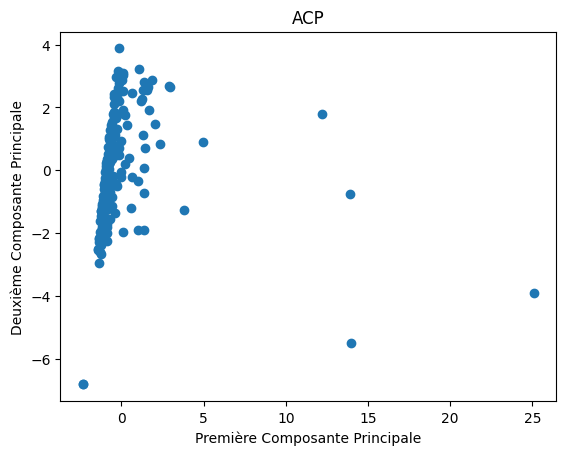

In [11]:
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Première Composante Principale')
plt.ylabel('Deuxième Composante Principale')
plt.title('ACP')
plt.show()


In [12]:
print(pca.explained_variance_ratio_)

[0.46595323 0.20021609]
